### Import the libraries

In [44]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_completeness_v_measure
from sklearn.decomposition import PCA, FastICA
from sklearn.datasets import load_iris, load_digits
from sklearn.random_projection import GaussianRandomProjection
from sklearn.ensemble import RandomForestClassifier
from sklearn import manifold
from matplotlib import offsetbox
from scipy.stats import kurtosis, pearsonr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

### Get and clean the datasets

In [2]:
data_iris = load_iris()
ds_iris = pd.DataFrame(data_iris.data, columns=data_iris.feature_names)
ds_iris['Output'] = data_iris.target
ds_iris.dropna(inplace=True)

In [3]:
data_digits = load_digits()
ds_digits = pd.DataFrame(data_digits.data, columns=data_digits.feature_names)
ds_digits['Output'] = data_digits.target
ds_digits.dropna(inplace=True)

### Display the datasets

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>],
       [<AxesSubplot:title={'center':'Output'}>, <AxesSubplot:>]],
      dtype=object)

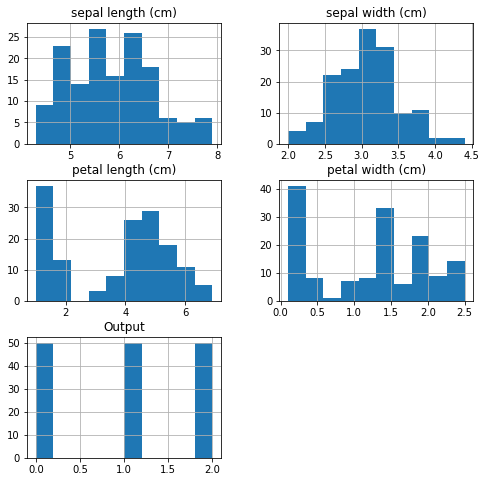

In [4]:
ds_iris.hist(figsize=(8,8))

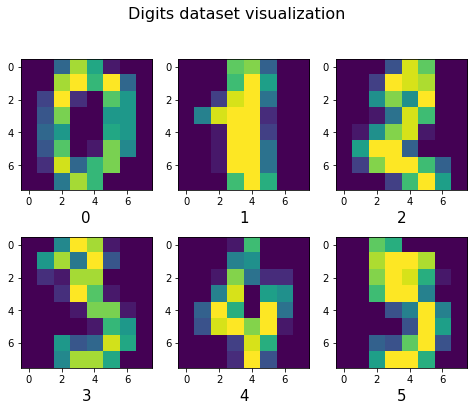

In [5]:
def display_digits(dataset_digits):
    digits = np.array(dataset_digits.iloc[:6,:])
    plt.figure(figsize=(8,6))
    for i in range(np.shape(digits)[0]):
        output = int(digits[i,-1])
        digit = digits[i,:-1].reshape((8,8))
        plt.subplot(2,3,i+1)
        plt.imshow(digit)
        plt.xlabel(output, fontsize=15)
    plt.suptitle('Digits dataset visualization', fontsize=16)

display_digits(ds_digits)

### Preprocessing the data

In [6]:
train_ds_iris, test_ds_iris = train_test_split(ds_iris, train_size=0.75, random_state=0, stratify=ds_iris['Output'])

y_train_iris = train_ds_iris.Output.reset_index(drop=True)
X_train_iris = train_ds_iris.drop('Output', axis=1)
y_test_iris = test_ds_iris.Output.reset_index(drop=True)
X_test_iris = test_ds_iris.drop('Output', axis=1)

scaler = preprocessing.StandardScaler().fit(X_train_iris)
X_train_iris = pd.DataFrame(data=scaler.transform(X_train_iris),columns=X_train_iris.columns)
X_test_iris = pd.DataFrame(data=scaler.transform(X_test_iris),columns=X_test_iris.columns)

In [7]:
train_ds_digits, test_ds_digits = train_test_split(ds_digits, train_size=0.75, random_state=0, stratify=ds_digits['Output'])

y_train_digits = train_ds_digits.Output.reset_index(drop=True)
X_train_digits = train_ds_digits.drop('Output', axis=1)
y_test_digits = test_ds_digits.Output.reset_index(drop=True)
X_test_digits = test_ds_digits.drop('Output', axis=1)

scaler = preprocessing.StandardScaler().fit(X_train_digits)
X_train_digits = pd.DataFrame(data=scaler.transform(X_train_digits),columns=X_train_digits.columns)
X_test_digits = pd.DataFrame(data=scaler.transform(X_test_digits),columns=X_test_digits.columns)

## Visualization of the data

Text(0.5, 0.98, 'Iris dataset visualization')

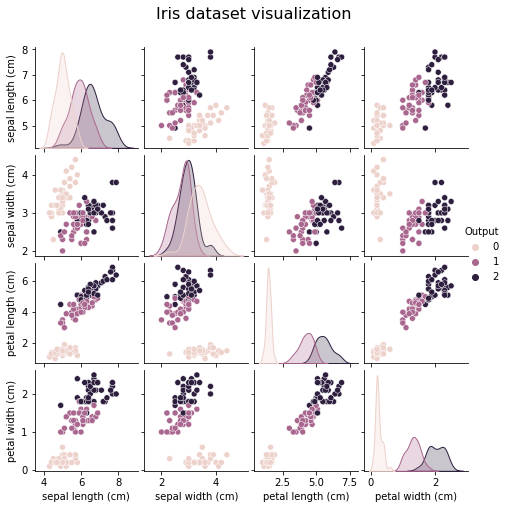

In [37]:
g = sns.pairplot(train_ds_iris, hue="Output")
g.fig.set_figwidth(7)
g.fig.set_figheight(7)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Iris dataset visualization', fontsize=16)

# Clustering

# K-Means

## Training Iris

2 3 4 5 6 7 8 9 10 

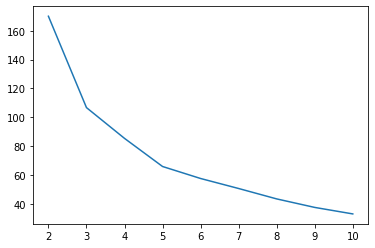

In [38]:
def SSE(points, kmax):
    sse = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        kmeans = KMeans(n_clusters=k).fit(points)
        centroids = kmeans.cluster_centers_
        sse.append(kmeans.inertia_)
    return sse
kmax = 10
plt.plot(range(2, kmax+1), SSE(X_train_iris, kmax))

2 3 4 5 6 7 8 9 10 

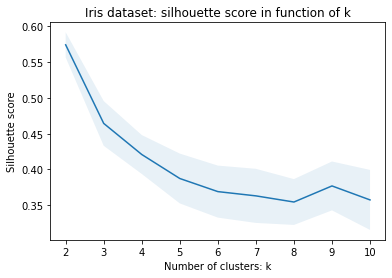

In [44]:
def silhouette(points, kmax):
    avg = []
    std = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(points)
        silhouette_avg = silhouette_score(points, cluster_labels)
        avg.append(np.mean(silhouette_samples(points, cluster_labels)))
        std.append(np.std(silhouette_samples(points, cluster_labels)))
    return avg, std

kmax = 10
means, std = silhouette(X_train_iris, kmax)
plt.title('Iris dataset: silhouette score in function of k')
plt.xlabel('Number of clusters: k')
plt.ylabel('Silhouette score')
plt.plot(range(2,kmax+1), means)
plt.fill_between(range(2,kmax+1), np.array(means)-np.array(std)**2, np.array(means)+np.array(std)**2, alpha=0.1)

## Training Digits

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

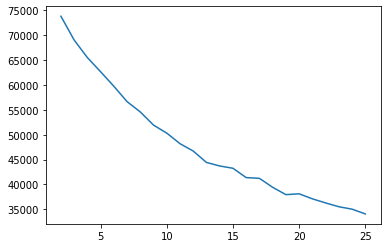

In [45]:
def SSE(points, kmax):
    sse = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        kmeans = KMeans(n_clusters=k).fit(points)
        centroids = kmeans.cluster_centers_
        sse.append(kmeans.inertia_)
    return sse
kmax = 25
plt.plot(range(2, kmax+1), SSE(X_train_digits, kmax))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

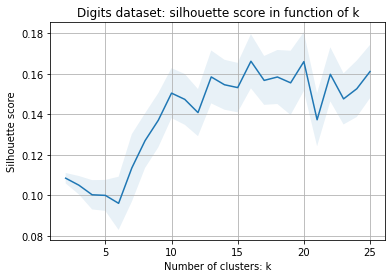

In [12]:
def silhouette(points, kmax):
    avg = []
    std = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(points)
        silhouette_avg = silhouette_score(points, cluster_labels)
        avg.append(np.mean(silhouette_samples(points, cluster_labels)))
        std.append(np.std(silhouette_samples(points, cluster_labels)))
    return avg, std

kmax = 25
means, std = silhouette(X_train_digits, kmax)
plt.title('Digits dataset: silhouette score in function of k')
plt.xlabel('Number of clusters: k')
plt.ylabel('Silhouette score')
plt.grid()
plt.plot(range(2,kmax+1), means)
plt.fill_between(range(2,kmax+1), np.array(means)-np.array(std)**2, np.array(means)+np.array(std)**2, alpha=0.1)

## Evaluating Iris

In [91]:
kmeans = KMeans(n_clusters=2)
t1 = time.time()
kmeans.fit(X_train_iris)
print(time.time()-t1)
y_pred = kmeans.predict(X_train_iris)
print(homogeneity_completeness_v_measure(y_train_iris, y_pred))
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_iris)
y_pred = kmeans.predict(X_train_iris)
homogeneity_completeness_v_measure(y_train_iris, y_pred)

0.0346837043762207
(0.5775260134200694, 1.0, 0.732192063404388)


(0.7070150660119658, 0.7183230172405671, 0.7126241856855986)

Text(0.5, 1.0, 'Clusters with k=3, bad initialization')

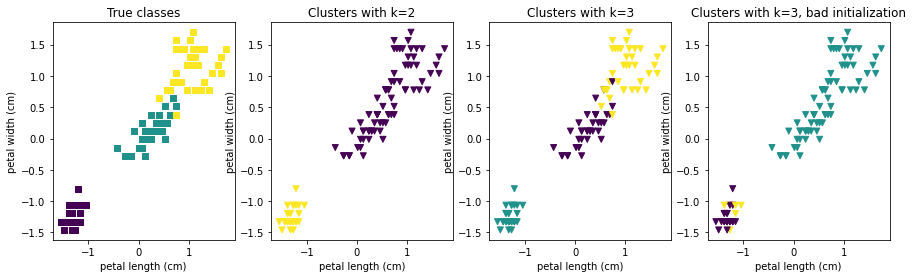

In [83]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train_iris)
y_pred = kmeans.predict(X_train_iris)
new_X_train_iris = X_train_iris
new_X_train_iris['Output'] = y_train_iris
new_X_train_iris['Prediction'] = y_pred
plt.figure(figsize=(15,4))
ax1 = plt.subplot(1,4,1)
plt.scatter(new_X_train_iris['petal length (cm)'], new_X_train_iris['petal width (cm)'], c=new_X_train_iris['Output'], marker='s')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
ax1.set_title('True classes')
ax2 = plt.subplot(1,4,2)
plt.scatter(new_X_train_iris['petal length (cm)'], new_X_train_iris['petal width (cm)'], c=new_X_train_iris['Prediction'], marker='v')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
ax2.set_title('Clusters with k=2')
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_iris)
y_pred = kmeans.predict(X_train_iris)
new_X_train_iris = X_train_iris
new_X_train_iris['Output'] = y_train_iris
new_X_train_iris['Prediction'] = y_pred
ax3 = plt.subplot(1,4,3)
plt.scatter(new_X_train_iris['petal length (cm)'], new_X_train_iris['petal width (cm)'], c=new_X_train_iris['Prediction'], marker='v')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
ax3.set_title('Clusters with k=3')
kmeans = KMeans(n_clusters=3, n_init=1, init='random')
kmeans.fit(X_train_iris)
y_pred = kmeans.predict(X_train_iris)
new_X_train_iris = X_train_iris
new_X_train_iris['Output'] = y_train_iris
new_X_train_iris['Prediction'] = y_pred
ax3 = plt.subplot(1,4,4)
plt.scatter(new_X_train_iris['petal length (cm)'], new_X_train_iris['petal width (cm)'], c=new_X_train_iris['Prediction'], marker='v')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
ax3.set_title('Clusters with k=3, bad initialization')

## Evaluation Digits

In [92]:
kmeans = KMeans(n_clusters=10)
t1 = time.time()
kmeans.fit(X_train_digits)
print(time.time()-t1)
y_pred = kmeans.predict(X_train_digits)
homogeneity_completeness_v_measure(y_train_digits, y_pred)

1.6758346557617188


(0.6064674474851364, 0.6886414558593426, 0.6449475019266057)

# Expectation Maximization

## Training Iris

2 3 4 5 6 7 8 9 10 

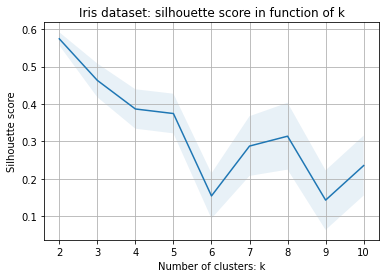

In [19]:
def silhouette(points, kmax):
    avg = []
    std = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        kmeans = GaussianMixture(n_components=k)
        cluster_labels = kmeans.fit_predict(points)
        silhouette_avg = silhouette_score(points, cluster_labels)
        avg.append(np.mean(silhouette_samples(points, cluster_labels)))
        std.append(np.std(silhouette_samples(points, cluster_labels)))
    return avg, std

kmax = 10
means, std = silhouette(X_train_iris, kmax)
plt.title('Iris dataset: silhouette score in function of k')
plt.xlabel('Number of clusters: k')
plt.ylabel('Silhouette score')
plt.grid()
plt.plot(range(2,kmax+1), means)
plt.fill_between(range(2,kmax+1), np.array(means)-np.array(std)**2, np.array(means)+np.array(std)**2, alpha=0.1)

2 3 4 5 6 7 8 9 10 [-174.72442926094294, -976.4739682194898, -1179.5400045505694, -1285.7541616401315, -1294.1874034501063, -1314.6855735383942, -1317.3971842356148, -1160.3822585892267, -1244.067111849154]
[0.0, 3.410605131648481e-13, 213.33217531616847, 197.4567799463099, 200.10298768158762, 217.76755472584367, 193.087593543186, 234.4062348047781, 78.40305515899185]


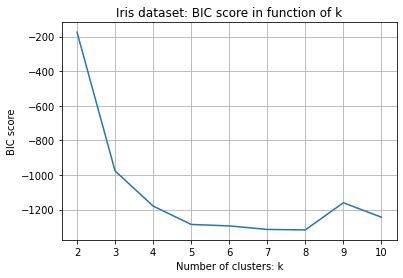

In [93]:
def BAIC_EM(points, kmax):
    avg = []
    std = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        test = []
        for i in range(20):
            gmm = GaussianMixture(n_components=k)
            gmm.fit(points)
            test.append(gmm.bic(points))
        avg.append(np.mean(test))
        std.append(np.std(test))
    return avg, std

kmax = 10
means, std = BAIC_EM(X_train_iris, kmax)
plt.title('Iris dataset: BIC score in function of k')
plt.xlabel('Number of clusters: k')
plt.ylabel('BIC score')
plt.grid()
plt.plot(range(2,kmax+1), means)

## Training Digits

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

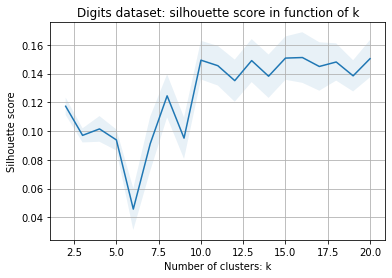

In [17]:
def silhouette(points, kmax):
    avg = []
    std = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        EM = GaussianMixture(n_components=k)
        cluster_labels = EM.fit_predict(points)
        silhouette_avg = silhouette_score(points, cluster_labels)
        avg.append(np.mean(silhouette_samples(points, cluster_labels)))
        std.append(np.std(silhouette_samples(points, cluster_labels)))
    return avg, std

kmax = 20
means, std = silhouette(X_train_digits, kmax)
plt.title('Digits dataset: silhouette score in function of k')
plt.xlabel('Number of clusters: k')
plt.ylabel('Silhouette score')
plt.grid()
plt.plot(range(2,kmax+1), means)
plt.fill_between(range(2,kmax+1), np.array(means)-np.array(std)**2, np.array(means)+np.array(std)**2, alpha=0.1)

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

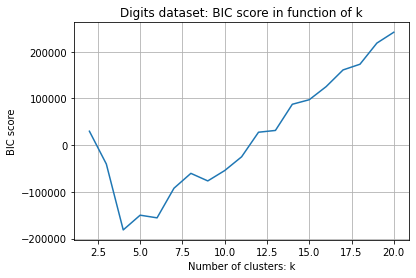

In [20]:
def BAIC_EM(points, kmax):
    bics = []
    aics = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        test = 0
        test2 = 0
        for i in range(3):
            gmm = GaussianMixture(n_components=k, max_iter=1000)
            gmm.fit(points)
            test += gmm.bic(points)
            test2+= gmm.aic(points)
        bics.append(test)
        aics.append(test2)
    return bics, aics

kmax = 20
BIC, AIC = BAIC_EM(X_train_digits, kmax)
plt.title('Digits dataset: BIC score in function of k')
plt.xlabel('Number of clusters: k')
plt.ylabel('BIC score')
plt.grid()
plt.plot(range(2, kmax+1), BIC)

### Evaluation Iris

In [93]:
ExMa = GaussianMixture(n_components=3)
t1 = time.time()
ExMa.fit(X_train_iris)
print(time.time()-t1)
y_pred = ExMa.predict(X_train_iris)
homogeneity_completeness_v_measure(y_train_iris, y_pred)

0.02269268035888672


(0.802275853858492, 0.8184161052841245, 0.810265610283791)

Text(0, 0.5, 'petal width (cm)')

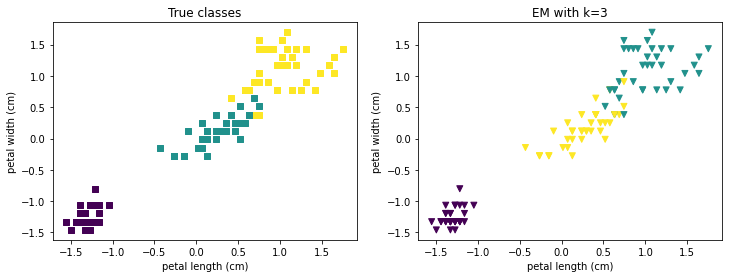

In [98]:
new_X_train_iris = X_train_iris
new_X_train_iris['Output'] = y_train_iris
new_X_train_iris['Prediction'] = y_pred
plt.figure(figsize=(12,4))
plt.subplot(1,2,1).set_title('True classes')
plt.scatter(new_X_train_iris['petal length (cm)'], new_X_train_iris['petal width (cm)'], c=new_X_train_iris['Output'], marker='s')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.subplot(1,2,2).set_title('EM with k=3')
plt.scatter(new_X_train_iris['petal length (cm)'], new_X_train_iris['petal width (cm)'], c=new_X_train_iris['Prediction'], marker='v')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

### Evaluation Digits

In [94]:
ExMa = GaussianMixture(n_components=10)
t1 = time.time()
ExMa.fit(X_train_digits)
print(time.time()-t1)
y_pred = ExMa.predict(X_train_digits)
homogeneity_completeness_v_measure(y_train_digits, y_pred)

3.06888484954834


(0.6045712467721932, 0.7163406728803327, 0.6557272551993)

# Dimensionnality Reduction

# PCA

### Training Iris

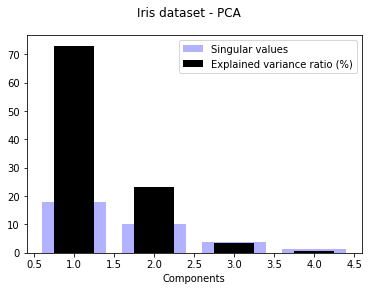

In [29]:
pca = PCA(n_components=0.999)
pca.fit(X_train_iris)
plt.bar(range(1, pca.n_features_+1), pca.singular_values_, color='blue', alpha=0.3, label="Singular values")
plt.bar(range(1, pca.n_features_+1), 100*pca.explained_variance_ratio_, color='black', width=0.5, label="Explained variance ratio (%)")
plt.xlabel('Components')
plt.suptitle('Iris dataset - PCA')
plt.legend()

### Training Digits

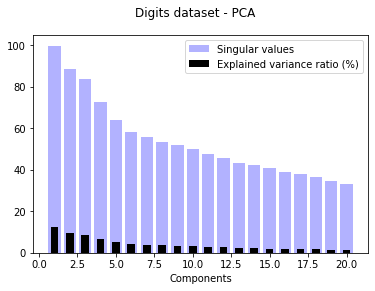

In [36]:
pca = PCA(n_components=0.8)
pca.fit(X_train_digits)
plt.bar(range(1, pca.n_components_+1), pca.singular_values_, color='blue', alpha=0.3, label="Singular values")
plt.bar(range(1, pca.n_components_+1), 100*pca.explained_variance_ratio_, color='black', width=0.5, label="Explained variance ratio (%)")
plt.xlabel('Components')
plt.suptitle('Digits dataset - PCA')
plt.legend()

### Evaluation Iris

[[ 0.52435567 -0.25908014  0.58067551  0.56634315]
 [ 0.37182116  0.92642925  0.02592507  0.05296936]]


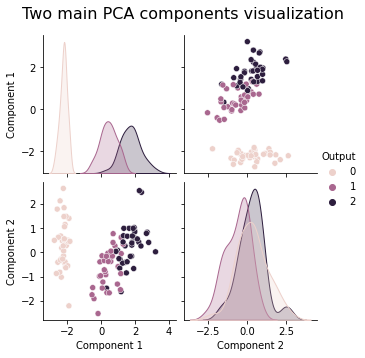

In [102]:
pca = PCA(n_components=2)
pca.fit(X_train_iris)
X_pca_iris = pd.DataFrame(pca.transform(X_train_iris), columns=['Component '+str(i) for i in range(1, pca.n_components_+1)])
X_pca_iris['Output'] = y_train_iris
g = sns.pairplot(X_pca_iris, hue='Output')
g.fig.set_figwidth(5)
g.fig.set_figheight(5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Two main PCA components visualization', fontsize=16)
print(pca.components_)

### Evaluation Digits

[[ 5.41778473 -5.04990801 20.19985248 13.17404695 -4.35624285  2.57304229]]


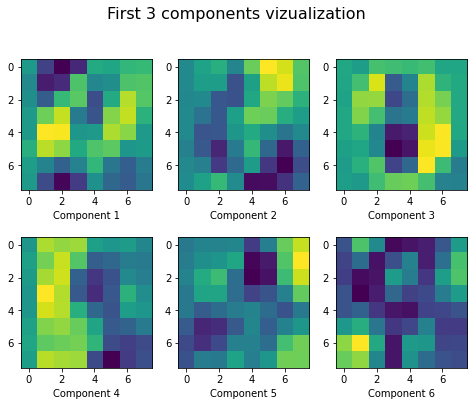

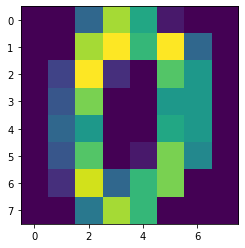

In [100]:
pca = PCA(n_components=6)
pca.fit(X_train_digits)

def display_digits(digits):
    digits = digits[:6,:]
    plt.figure(figsize=(8,6))
    for i in range(np.shape(digits)[0]):
        digit = digits[i,:].reshape((8,8))
        plt.subplot(2,3,i+1)
        plt.imshow(digit)
        plt.xlabel('Component ' + str(i+1))
    plt.suptitle('First 6 components vizualization', fontsize=16)

display_digits(pca.components_)
pca_X_train = pca.fit_transform(X_train_digits)
elem = np.array(ds_digits.iloc[0,:-1]).reshape((8,8))
output = ds_digits.iloc[0,-1]
plt.figure()
plt.imshow(elem)
elem = pd.DataFrame(elem.reshape(1,64), columns=X_train_digits.columns)
print(pca.transform(elem))

In [29]:
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y_train_digits[i]),
                 color=plt.cm.Set1(y_train_digits[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            #imagebox = offsetbox.AnnotationBbox(
                #offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),X[i])
            #ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

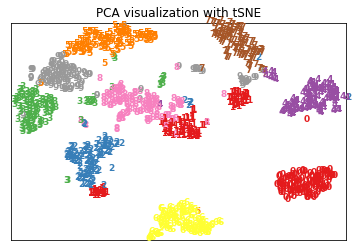

In [32]:
pca = PCA(n_components=20)
pca.fit(X_train_digits)
X_pca_digits = pca.transform(X_train_digits)
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X_pca_digits)
plot_embedding(X_tsne, title="PCA visualization with tSNE")

# ICA 

### Training Iris

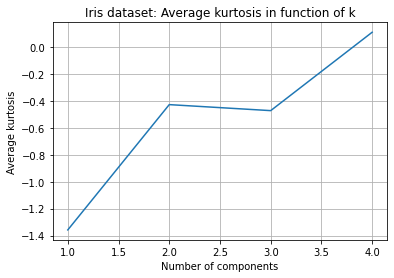

In [105]:
def kurtosis_ICA(points, N):
    l_kurtosis = []
    for n in range(1, 1+N):
        ica = FastICA(n_components=n)
        ica.fit(points)
        results = pd.DataFrame(ica.transform(points), columns=range(1,n+1))
        l_kurtosis.append(np.mean([kurtosis(results.loc[:,i]) for i in range(1,n+1)]))
    return l_kurtosis

N = len(X_train_iris.columns)
plt.title('Iris dataset: Average kurtosis in function of k')
plt.xlabel('Number of components')
plt.ylabel('Average kurtosis')
plt.grid()
plt.plot(range(1, N+1), kurtosis_ICA(X_train_iris, N))

### Training digits

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 

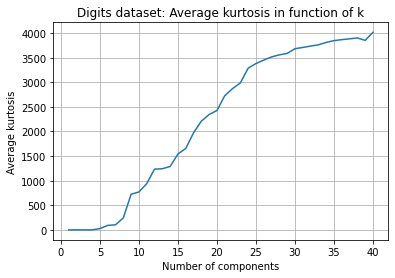

In [112]:
import warnings
warnings.filterwarnings("ignore")
def kurtosis_ICA(points, N):
    l_kurtosis = []
    for n in range(1, 1+N):
        print(n, end=' ')
        ica = FastICA(n_components=n, max_iter=1000)
        ica.fit(points)
        results = pd.DataFrame(ica.transform(points), columns=range(1,n+1))
        l_kurtosis.append(np.sum([kurtosis(results.loc[:,i]) for i in range(1,n+1)]))
    return l_kurtosis

N = 40
plt.title('Digits dataset: Average kurtosis in function of k')
plt.xlabel('Number of components')
plt.ylabel('Average kurtosis')
plt.grid()
plt.plot(range(1, N+1), kurtosis_ICA(X_train_digits, N))

### Evaluation iris

[[ 0.52435567 -0.25908014  0.58067551  0.56634315]
 [ 0.37182116  0.92642925  0.02592507  0.05296936]]


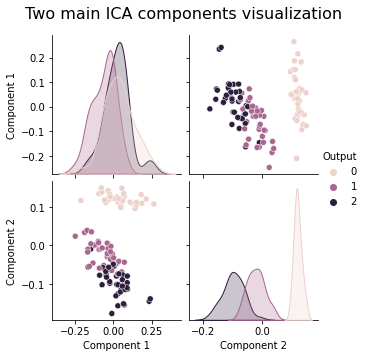

In [110]:
ica = FastICA(n_components=2)
ica.fit(X_train_iris)
X_ica_iris = pd.DataFrame(ica.transform(X_train_iris), columns=['Component '+str(i) for i in range(1, 2+1)])
X_ica_iris['Output'] = y_train_iris
g = sns.pairplot(X_ica_iris, hue='Output')
g.fig.set_figwidth(5)
g.fig.set_figheight(5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Two main ICA components visualization', fontsize=16)
print(pca.components_)

### Evaluation digits

/home/raph/.local/lib/python3.6/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/home/raph/.local/lib/python3.6/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


[[-0.11500244 -0.1786533   0.02759646  0.44653411 -0.11598769 -0.05924529
   0.10503083  0.25852375 -0.22305007 -0.05403336]]


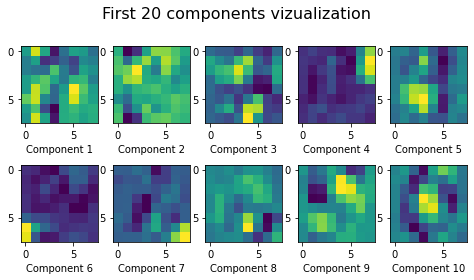

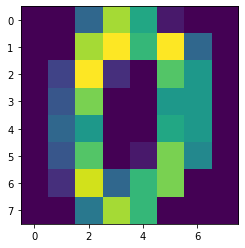

In [97]:
ica = FastICA(n_components=10)
ica.fit(X_train_digits)

def display_digits(digits):
    digits = digits[:20,:]
    plt.figure(figsize=(8,4))
    for i in range(np.shape(digits)[0]):
        digit = digits[i,:].reshape((8,8))
        plt.subplot(2,5,i+1)
        plt.imshow(digit)
        plt.xlabel('Component ' + str(i+1))
    plt.suptitle('First 20 components vizualization', fontsize=16)

display_digits(ica.components_)
pca_X_train = ica.fit_transform(X_train_digits)
elem = np.array(ds_digits.iloc[0,:-1]).reshape((8,8))
output = ds_digits.iloc[0,-1]
plt.figure()
plt.imshow(elem)
elem = pd.DataFrame(elem.reshape(1,64), columns=X_train_digits.columns)
print(ica.transform(elem))

/home/raph/.local/lib/python3.6/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


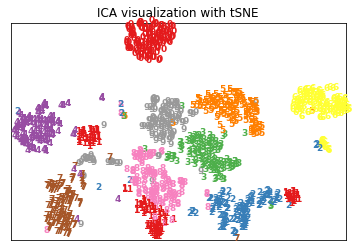

In [35]:
ica = FastICA(n_components=23)
ica.fit(X_train_digits)
X_ica_digits = ica.transform(X_train_digits)
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X_ica_digits)
plot_embedding(X_tsne, title="ICA visualization with tSNE")

## Randimized Projections

### Training Iris

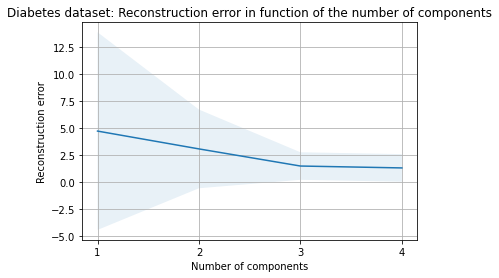

In [11]:
def reconstruction_error_RP(points, N):
    mean_r_errors = []
    std_r_errors = []
    for n in range(1, 1+N):
        temp = []
        for i in range(100):
            RP = GaussianRandomProjection(n_components=n)
            Diabetesrp = RP.fit_transform(points)
            recon = np.dot(Diabetesrp, RP.components_)
            temp.append(np.mean((np.array(points) - recon)**2))
        mean_r_errors.append(np.mean(temp))
        std_r_errors.append(np.std(temp))
    return mean_r_errors, std_r_errors

N = len(X_train_iris.columns)
means, std = reconstruction_error_RP(X_train_iris, N)
plt.title('Diabetes dataset: Reconstruction error in function of the number of components')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction error')
plt.grid()
plt.plot(range(1, N+1), means)
plt.xticks(range(1, N+1))
plt.fill_between(range(1, N+1), np.array(means)-np.array(std), np.array(means)+np.array(std), alpha=0.1)

### Training Digits

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 

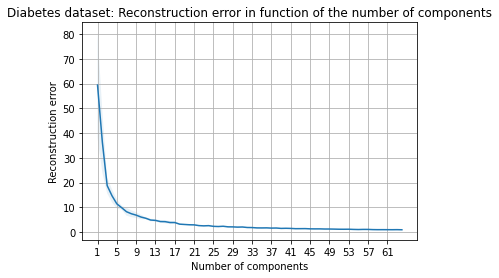

In [22]:
def reconstruction_error_RP(points, N):
    mean_r_errors = []
    std_r_errors = []
    for n in range(1, 1+N):
        print(n, end=' ')
        temp = []
        for i in range(10):
            RP = GaussianRandomProjection(n_components=n)
            Diabetesrp = RP.fit_transform(points)
            recon = np.dot(Diabetesrp, RP.components_)
            temp.append(np.mean((np.array(points) - recon)**2))
        mean_r_errors.append(np.mean(temp))
        std_r_errors.append(np.std(temp))
    return mean_r_errors, std_r_errors

N = len(X_train_digits.columns)
means, std = reconstruction_error_RP(X_train_digits, N)
plt.title('Diabetes dataset: Reconstruction error in function of the number of components')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction error')
plt.grid()
plt.plot(range(1, N+1), means)
plt.xticks(range(1, 64, 4))
plt.fill_between(range(1, N+1), np.array(means)-np.array(std), np.array(means)+np.array(std), alpha=0.1)

### Evaluation Iris

Text(0.5, 0.98, 'Three RP components visualization')

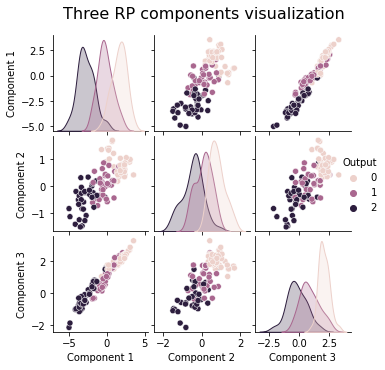

In [98]:
RP = GaussianRandomProjection(n_components=3)
RP.fit(X_train_iris)
X_rp_iris = pd.DataFrame(RP.transform(X_train_iris), columns=['Component '+str(i) for i in range(1, 3+1)])
X_rp_iris['Output'] = y_train_iris
g = sns.pairplot(X_rp_iris, hue='Output')
g.fig.set_figwidth(5)
g.fig.set_figheight(5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Three RP components visualization', fontsize=16)

Text(0.5, 0.98, 'Three RP components visualization')

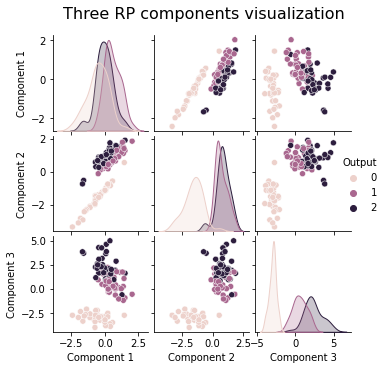

In [16]:
RP = GaussianRandomProjection(n_components=3)
RP.fit(X_train_iris)
X_rp_iris = pd.DataFrame(RP.transform(X_train_iris), columns=['Component '+str(i) for i in range(1, 3+1)])
X_rp_iris['Output'] = y_train_iris
g = sns.pairplot(X_rp_iris, hue='Output')
g.fig.set_figwidth(5)
g.fig.set_figheight(5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Three RP components visualization', fontsize=16)

### 

### Digits evaluation

/home/raph/.local/lib/python3.6/site-packages/sklearn/random_projection.py:390: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (64 < 1000).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


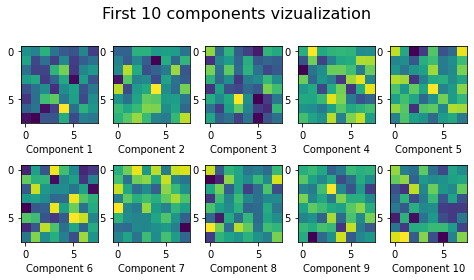

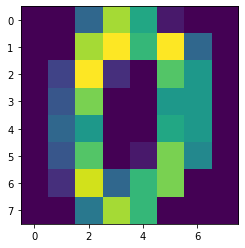

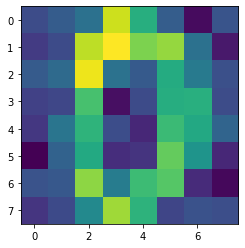

In [48]:
RP = GaussianRandomProjection(n_components=10)
RP.fit(X_train_digits)

def display_digits(digits):
    digits = digits[:10,:]
    plt.figure(figsize=(8,4))
    for i in range(np.shape(digits)[0]):
        digit = digits[i,:].reshape((8,8))
        plt.subplot(2,5,i+1)
        plt.imshow(digit)
        plt.xlabel('Component ' + str(i+1))
    plt.suptitle('First 10 components vizualization', fontsize=16)

display_digits(RP.components_)
pca_X_train = RP.fit_transform(X_train_digits)
elem = np.array(ds_digits.iloc[0,:-1]).reshape((8,8))
output = ds_digits.iloc[0,-1]
plt.figure()
plt.imshow(elem)
elem = pd.DataFrame(elem.reshape(1,64), columns=X_train_digits.columns)
plt.figure()
RP = GaussianRandomProjection(n_components=1000)
RP.fit(X_train_digits)
plt.imshow(np.dot(RP.transform(elem),RP.components_).reshape(8,8))

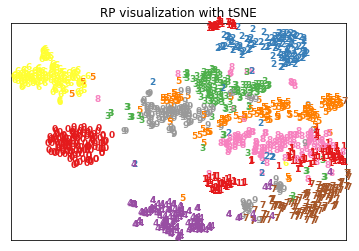

In [36]:
rp = GaussianRandomProjection(n_components=30)
rp.fit(X_train_digits)
X_rp_digits = rp.transform(X_train_digits)
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X_rp_digits)
plot_embedding(X_tsne, title="RP visualization with tSNE")

# Random Forest

### Train Iris

6.967803478240967


<BarContainer object of 4 artists>

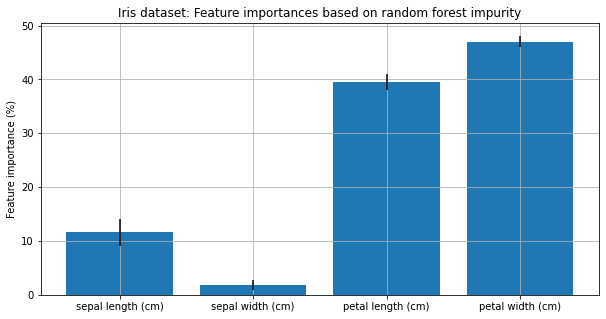

In [81]:
def importances(points):
    importances = []
    for i in range(1, 6):
        RFC = RandomForestClassifier(n_estimators=1000, max_depth=i)
        RFC.fit(X_train_iris, y_train_iris)
        importances.append(list(RFC.feature_importances_))
    return np.mean(importances, axis=0), np.std(importances, axis=0)

t1 = time.time()
means, std = importances(X_train_iris)
print(time.time()-t1)
plt.figure(figsize=(10,5))
plt.title('Iris dataset: Feature importances based on random forest impurity')
plt.ylabel('Feature importance (%)')
plt.xticks(range(1, len(X_train_iris.columns)+1), X_train_iris.columns)
plt.grid()
plt.bar(range(1, len(X_train_iris.columns)+1), 100*means, yerr=100*std)

### Train Digits

10.763189554214478
[0.00000000e+00 4.44258109e-04 1.56001681e-02 2.32003975e-03
 1.40106637e-03 1.14380083e-02 4.25894819e-03 3.66464311e-05
 2.51021905e-06 6.97876545e-03 2.62714737e-02 9.39170515e-04
 3.80166538e-03 2.71677737e-02 9.98911846e-04 4.04322001e-05
 0.00000000e+00 3.56342074e-03 9.95572235e-03 1.44108159e-02
 2.18812544e-02 6.61831852e-02 5.02278853e-03 3.96175536e-05
 0.00000000e+00 7.76925389e-03 5.01070077e-02 1.15458545e-02
 5.97264275e-02 1.39342329e-02 5.75674186e-02 2.01624572e-06
 0.00000000e+00 5.64080125e-02 3.37971434e-02 1.31320717e-02
 7.97152948e-02 1.15429333e-02 3.55735617e-02 0.00000000e+00
 1.30671001e-06 9.89607984e-03 4.82477274e-02 6.05997809e-02
 1.38611742e-02 7.78257388e-03 1.87624155e-02 3.69876290e-06
 0.00000000e+00 2.26728988e-04 1.03612793e-02 9.48007839e-03
 5.12648753e-03 2.64252019e-02 3.02468259e-02 3.19242296e-04
 0.00000000e+00 4.20714438e-04 1.76104296e-02 3.01228335e-03
 3.74180852e-02 2.96326610e-02 1.61111995e-02 8.76153683e-04]


<BarContainer object of 64 artists>

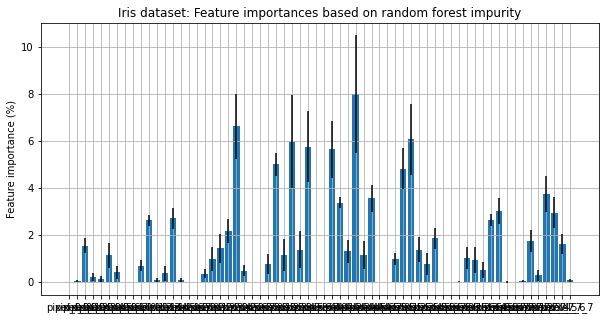

In [83]:
def importances(points):
    importances = []
    for i in range(1, 6):
        RFC = RandomForestClassifier(n_estimators=1000, max_depth=i)
        RFC.fit(X_train_digits, y_train_digits)
        importances.append(list(RFC.feature_importances_))
    return np.mean(importances, axis=0), np.std(importances, axis=0)

t1 = time.time()
means, std = importances(X_train_digits)
print(time.time()-t1)
print(means)
plt.figure(figsize=(10,5))
plt.title('Iris dataset: Feature importances based on random forest impurity')
plt.ylabel('Feature importance (%)')
plt.xticks(range(1, len(X_train_digits.columns)+1), X_train_digits.columns)
plt.grid()
plt.bar(range(1, len(X_train_digits.columns)+1), 100*means, yerr=100*std)

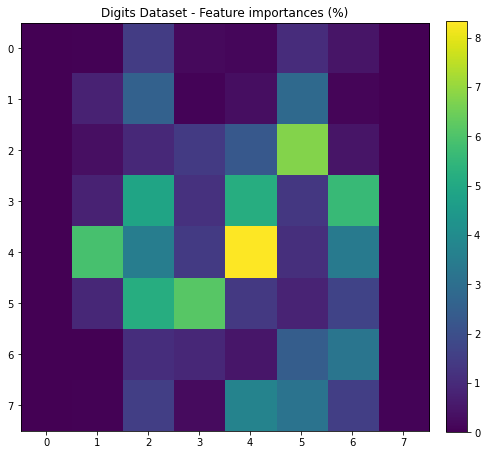

In [138]:
def display_digits2(digits):
    plt.figure(figsize=(8,10))
    digit = digits.reshape((8,8))
    plt.title("Digits Dataset - Feature importances (%)")
    im = plt.imshow(digit)
    plt.colorbar(im, fraction=0.046, pad=0.04)

def importances():
    importances = []
    for i in range(1, 6):
        RFC = RandomForestClassifier(n_estimators=1000, max_depth=i)
        RFC.fit(X_train_digits, y_train_digits)
        importances.append(list(RFC.feature_importances_))
    return np.mean(importances, axis=0), np.std(importances, axis=0)

means, _ = importances()
display_digits2(100*means)

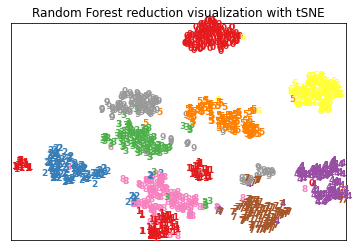

In [43]:
X_rf_digits = X_train_digits.iloc[:,to_keep].copy()
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X_rf_digits)
plot_embedding(X_tsne, title="Random Forest reduction visualization with tSNE")

# Clustering after dimensionality reduction

# PCA - KMeans

### Iris

In [45]:
pca = PCA(n_components=2)
t1 = time.time()
pca.fit(X_train_iris)
print(time.time()-t1)
X_pca_iris = pd.DataFrame(pca.transform(X_train_iris), columns=['Component '+str(i) for i in range(1, pca.n_components_+1)])
X_pca_iris['Output'] = y_train_iris

0.0038776397705078125


2 3 4 5 6 7 8 9 10 

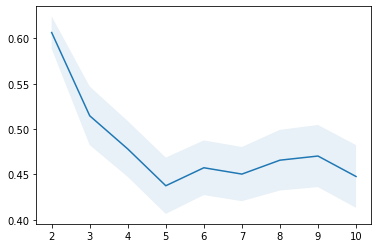

In [224]:
def silhouette(points, kmax):
    avg = []
    std = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(points)
        silhouette_avg = silhouette_score(points, cluster_labels)
        avg.append(np.mean(silhouette_samples(points, cluster_labels)))
        std.append(np.std(silhouette_samples(points, cluster_labels)))
    return avg, std

kmax = 10
means, std = silhouette(X_pca_iris, kmax)
plt.plot(range(2,kmax+1), means)
plt.fill_between(range(2,kmax+1), np.array(means)-np.array(std)**2, np.array(means)+np.array(std)**2, alpha=0.1)

In [46]:
y_pca_iris = X_pca_iris['Output']
X_pca_iris.drop('Output', axis=1, inplace=True)
kmeans = KMeans(n_clusters=3)
t1 = time.time()
kmeans.fit(X_pca_iris)
print(time.time()-t1)
y_pred = kmeans.predict(X_pca_iris)
homogeneity_completeness_v_measure(y_pca_iris, y_pred)

0.07121157646179199


(0.7173242988907971, 0.7261984481536482, 0.7217340963195251)

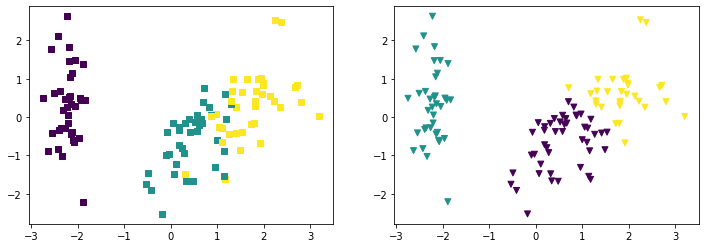

In [229]:
new_X_pca_iris = X_pca_iris
new_X_pca_iris['Output'] = y_pca_iris
new_X_pca_iris['Prediction'] = y_pred
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(new_X_pca_iris.iloc[:,0], new_X_pca_iris.iloc[:,1], c=new_X_pca_iris['Output'], marker='s')
plt.subplot(1,2,2)
plt.scatter(new_X_pca_iris.iloc[:,0], new_X_pca_iris.iloc[:,1], c=new_X_pca_iris['Prediction'], marker='v')

### Digits

In [86]:
pca = PCA(n_components=20)
t1 = time.time()
pca.fit(X_train_digits)
print(time.time()-t1)
X_pca_digits = pd.DataFrame(pca.transform(X_train_digits), columns=['Component '+str(i) for i in range(1, pca.n_components_+1)])
X_pca_digits['Output'] = y_train_digits

0.17395782470703125


2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

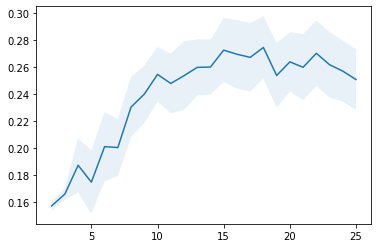

In [239]:
def silhouette(points, kmax):
    avg = []
    std = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(points)
        silhouette_avg = silhouette_score(points, cluster_labels)
        avg.append(np.mean(silhouette_samples(points, cluster_labels)))
        std.append(np.std(silhouette_samples(points, cluster_labels)))
    return avg, std

kmax = 25
means, std = silhouette(X_pca_digits, kmax)
plt.plot(range(2,kmax+1), means)
plt.fill_between(range(2,kmax+1), np.array(means)-np.array(std)**2, np.array(means)+np.array(std)**2, alpha=0.1)

In [87]:
y_pca_digits = X_pca_digits['Output']
X_pca_digits.drop('Output', axis=1, inplace=True)
kmeans = KMeans(n_clusters=10)
t1 = time.time()
kmeans.fit(X_pca_digits)
print(time.time()-t1)
y_pred = kmeans.predict(X_pca_digits)
homogeneity_completeness_v_measure(y_pca_digits, y_pred)

1.437913417816162


(0.6475198773932321, 0.7210599747909566, 0.6823141020593806)

# PCA - Expectation Maximization

### Iris

In [48]:
pca = PCA(n_components=2)
t1 = time.time()
pca.fit(X_train_iris)
print(time.time()-t1)
X_pca_iris = pd.DataFrame(pca.transform(X_train_iris), columns=['Component '+str(i) for i in range(1, pca.n_components_+1)])
X_pca_iris['Output'] = y_train_iris

0.0025696754455566406


2 3 4 5 6 7 8 9 10 

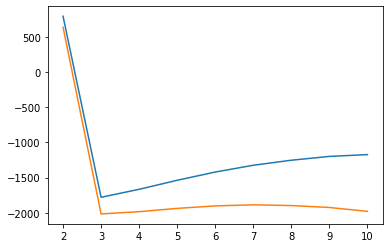

In [253]:
def BAIC_EM(points, kmax):
    bics = []
    aics = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        test = 0
        test2 = 0
        for i in range(3):
            gmm = GaussianMixture(n_components=k)
            gmm.fit(points)
            test += gmm.bic(points)
            test2+= gmm.aic(points)
        bics.append(test)
        aics.append(test2)
    return bics, aics

kmax = 10
BIC, AIC = BAIC_EM(X_pca_iris, kmax)
plt.plot(range(2, kmax+1), BIC)
plt.plot(range(2, kmax+1), AIC)

In [88]:
y_pca_iris = X_pca_iris['Output']
X_pca_iris.drop('Output', axis=1, inplace=True)
ExMa = GaussianMixture(n_components=3)
t1 = time.time()
ExMa.fit(X_pca_iris)
print(time.time()-t1)
y_pred = ExMa.predict(X_pca_iris)
homogeneity_completeness_v_measure(y_pca_iris, y_pred)

0.009995460510253906


(0.7783053389327382, 0.8016135932955656, 0.7897875349123794)

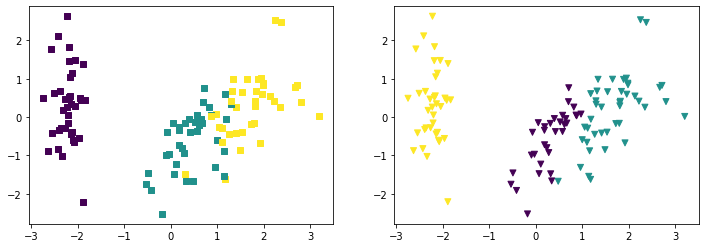

In [255]:
new_X_pca_iris = X_pca_iris
new_X_pca_iris['Output'] = y_pca_iris
new_X_pca_iris['Prediction'] = y_pred
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(new_X_pca_iris.iloc[:,0], new_X_pca_iris.iloc[:,1], c=new_X_pca_iris['Output'], marker='s')
plt.subplot(1,2,2)
plt.scatter(new_X_pca_iris.iloc[:,0], new_X_pca_iris.iloc[:,1], c=new_X_pca_iris['Prediction'], marker='v')

### Digits

In [89]:
pca = PCA(n_components=20)
t1 = time.time()
pca.fit(X_train_digits)
print(time.time()-t1)
X_pca_digits = pd.DataFrame(pca.transform(X_train_digits), columns=['Component '+str(i) for i in range(1, pca.n_components_+1)])
X_pca_digits['Output'] = y_train_digits

0.21364879608154297


2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

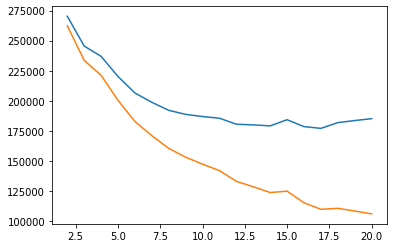

In [257]:
def BAIC_EM(points, kmax):
    bics = []
    aics = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        test = 0
        test2 = 0
        for i in range(3):
            gmm = GaussianMixture(n_components=k, max_iter=1000)
            gmm.fit(points)
            test += gmm.bic(points)
            test2+= gmm.aic(points)
        bics.append(test)
        aics.append(test2)
    return bics, aics

kmax = 20
BIC, AIC = BAIC_EM(X_pca_digits, kmax)
plt.plot(range(2, kmax+1), BIC)
plt.plot(range(2, kmax+1), AIC)

In [90]:
y_pca_digits = X_pca_digits['Output']
X_pca_digits.drop('Output', axis=1, inplace=True)
ExMa = GaussianMixture(n_components=10)
t1 = time.time()
ExMa.fit(X_pca_digits)
print(time.time()-t1)
y_pred = ExMa.predict(X_pca_digits)
homogeneity_completeness_v_measure(y_pca_digits, y_pred)

1.1700000762939453


(0.5907707940291785, 0.6610770172210124, 0.6239496380763254)

# ICA KMeans

### Iris

In [50]:
ica = FastICA(n_components=2)
t1 = time.time()
ica.fit(X_train_iris)
print(time.time()-t1)
X_ica_iris = pd.DataFrame(ica.transform(X_train_iris), columns=['Component '+str(i) for i in range(1, 2+1)])
X_ica_iris['Output'] = y_train_iris

0.003361225128173828


2 3 4 5 6 7 8 9 10 

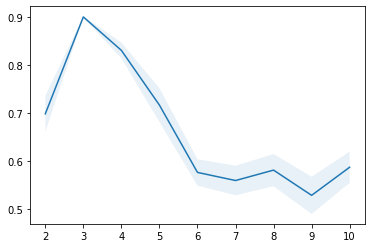

In [138]:
def silhouette(points, kmax):
    avg = []
    std = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(points)
        silhouette_avg = silhouette_score(points, cluster_labels)
        avg.append(np.mean(silhouette_samples(points, cluster_labels)))
        std.append(np.std(silhouette_samples(points, cluster_labels)))
    return avg, std

kmax = 10
means, std = silhouette(X_ica_iris, kmax)
plt.plot(range(2,kmax+1), means)
plt.fill_between(range(2,kmax+1), np.array(means)-np.array(std)**2, np.array(means)+np.array(std)**2, alpha=0.1)

In [52]:
y_ica_iris = X_ica_iris['Output']
X_ica_iris.drop('Output', axis=1, inplace=True)
t1 = time.time()
kmeans = KMeans(n_clusters=3)
print(time.time()-t1)
kmeans.fit(X_ica_iris)
y_pred = kmeans.predict(X_ica_iris)
homogeneity_completeness_v_measure(y_ica_iris, y_pred)

0.00023937225341796875


(0.6265540729379214, 0.6272287454479902, 0.626891227669095)

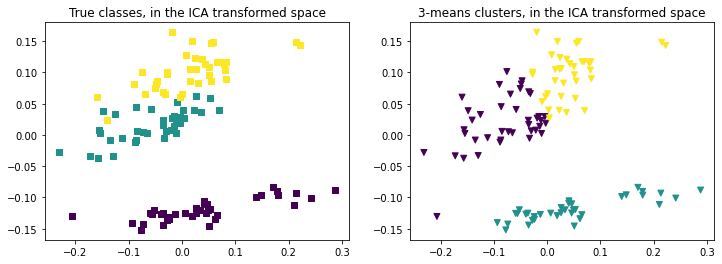

In [142]:
new_X_ica_iris = X_ica_iris
new_X_ica_iris['Output'] = y_ica_iris
new_X_ica_iris['Prediction'] = y_pred
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('True classes, in the ICA transformed space')
plt.scatter(new_X_ica_iris.iloc[:,0], new_X_ica_iris.iloc[:,1], c=new_X_ica_iris['Output'], marker='s')
plt.subplot(1,2,2)
plt.title('3-means clusters, in the ICA transformed space')
plt.scatter(new_X_ica_iris.iloc[:,0], new_X_ica_iris.iloc[:,1], c=new_X_ica_iris['Prediction'], marker='v')

### Digits

In [51]:
ica = FastICA(n_components=12)
t1 = time.time()
ica.fit(X_train_digits)
print(time.time()-t1)
X_ica_digits = pd.DataFrame(ica.transform(X_train_digits), columns=['Component '+str(i) for i in range(1, 12+1)])
X_ica_digits['Output'] = y_train_digits

0.4632265567779541


/home/raph/.local/lib/python3.6/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

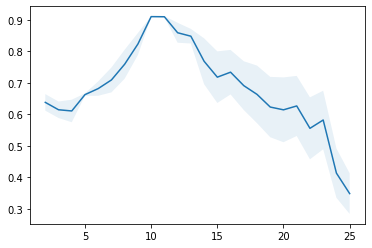

In [285]:
def silhouette(points, kmax):
    avg = []
    std = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(points)
        silhouette_avg = silhouette_score(points, cluster_labels)
        avg.append(np.mean(silhouette_samples(points, cluster_labels)))
        std.append(np.std(silhouette_samples(points, cluster_labels)))
    return avg, std

kmax = 25
means, std = silhouette(X_ica_digits, kmax)
plt.plot(range(2,kmax+1), means)
plt.fill_between(range(2,kmax+1), np.array(means)-np.array(std)**2, np.array(means)+np.array(std)**2, alpha=0.1)

In [53]:
y_ica_digits = X_ica_digits['Output']
X_ica_digits.drop('Output', axis=1, inplace=True)
t1 = time.time()
kmeans = KMeans(n_clusters=10)
print(time.time()-t1)
kmeans.fit(X_ica_digits)
y_pred = kmeans.predict(X_ica_digits)
homogeneity_completeness_v_measure(y_ica_digits, y_pred)

0.00021314620971679688


(0.5975606225042567, 0.6720709457170952, 0.6326294064227538)

# ICA Expectation Minimisation

### Iris 

In [57]:
ica = FastICA(n_components=2)
t1 = time.time()
ica.fit(X_train_iris)
print(time.time()-t1)
X_ica_iris = pd.DataFrame(ica.transform(X_train_iris), columns=['Component '+str(i) for i in range(1, 2+1)])
X_ica_iris['Output'] = y_train_iris

0.003245115280151367


2 3 4 5 6 7 8 9 10 

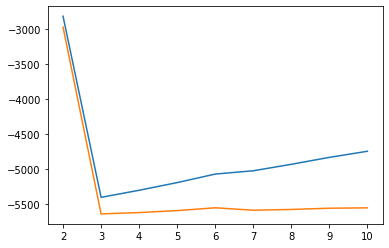

In [124]:
def BAIC_EM(points, kmax):
    bics = []
    aics = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        test = 0
        test2 = 0
        for i in range(3):
            gmm = GaussianMixture(n_components=k)
            gmm.fit(points)
            test += gmm.bic(points)
            test2+= gmm.aic(points)
        bics.append(test)
        aics.append(test2)
    return bics, aics

kmax = 10
BIC, AIC = BAIC_EM(X_ica_iris, kmax)
plt.plot(range(2, kmax+1), BIC)
plt.plot(range(2, kmax+1), AIC)

In [58]:
y_ica_iris = X_ica_iris['Output']
X_ica_iris.drop('Output', axis=1, inplace=True)
ExMa = GaussianMixture(n_components=3)
t1 = time.time()
ExMa.fit(X_ica_iris)
print(time.time()-t1)
y_pred = ExMa.predict(X_ica_iris)
homogeneity_completeness_v_measure(y_ica_iris, y_pred)

0.038980960845947266


(0.7511695392649553, 0.7561037878923839, 0.7536285871372311)

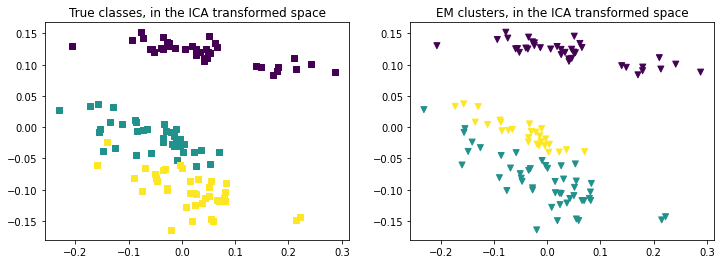

In [146]:
new_X_ica_iris = X_ica_iris
new_X_ica_iris['Output'] = y_ica_iris
new_X_ica_iris['Prediction'] = y_pred
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('True classes, in the ICA transformed space')
plt.scatter(new_X_ica_iris.iloc[:,0], new_X_ica_iris.iloc[:,1], c=new_X_ica_iris['Output'], marker='s')
plt.subplot(1,2,2)
plt.title('EM clusters, in the ICA transformed space')
plt.scatter(new_X_ica_iris.iloc[:,0], new_X_ica_iris.iloc[:,1], c=new_X_ica_iris['Prediction'], marker='v')

### Digits

In [59]:
ica = FastICA(n_components=12)
t1 = time.time()
ica.fit(X_train_digits)
print(time.time()-t1)
X_ica_digits = pd.DataFrame(ica.transform(X_train_digits), columns=['Component '+str(i) for i in range(1, 12+1)])
X_ica_digits['Output'] = y_train_digits

0.467681884765625


/home/raph/.local/lib/python3.6/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

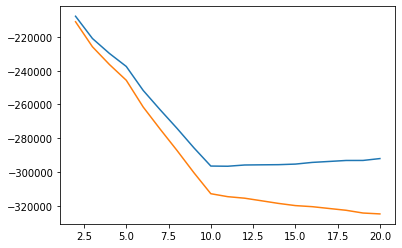

In [307]:
def BAIC_EM(points, kmax):
    bics = []
    aics = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        test = 0
        test2 = 0
        for i in range(3):
            gmm = GaussianMixture(n_components=k, max_iter=1000)
            gmm.fit(points)
            test += gmm.bic(points)
            test2+= gmm.aic(points)
        bics.append(test)
        aics.append(test2)
    return bics, aics

kmax = 20
BIC, AIC = BAIC_EM(X_ica_digits, kmax)
plt.plot(range(2, kmax+1), BIC)
plt.plot(range(2, kmax+1), AIC)

In [60]:
y_ica_digits = X_ica_digits['Output']
X_ica_digits.drop('Output', axis=1, inplace=True)
ExMa = GaussianMixture(n_components=10)
t1 = time.time()
ExMa.fit(X_ica_digits)
print(time.time()-t1)
y_pred = ExMa.predict(X_ica_digits)
homogeneity_completeness_v_measure(y_ica_digits, y_pred)

0.6682038307189941


(0.6279122202506071, 0.6871894343114633, 0.6562148894489188)

# RP KMeans

### Iris

In [61]:
rp = GaussianRandomProjection(n_components=3)
t1 = time.time()
rp.fit(X_train_iris)
print(time.time()-t1)
X_rp_iris = pd.DataFrame(rp.transform(X_train_iris), columns=['Component '+str(i) for i in range(1, 3+1)])
X_rp_iris['Output'] = y_train_iris

0.0018596649169921875


2 3 4 5 6 7 8 9 10 

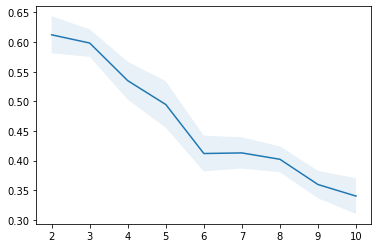

In [55]:
def silhouette(points, kmax):
    avg = []
    std = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(points)
        silhouette_avg = silhouette_score(points, cluster_labels)
        avg.append(np.mean(silhouette_samples(points, cluster_labels)))
        std.append(np.std(silhouette_samples(points, cluster_labels)))
    return avg, std

kmax = 10
means, std = silhouette(X_rp_iris, kmax)
plt.plot(range(2,kmax+1), means)
plt.fill_between(range(2,kmax+1), np.array(means)-np.array(std)**2, np.array(means)+np.array(std)**2, alpha=0.1)

In [62]:
y_rp_iris = X_rp_iris['Output']
X_rp_iris.drop('Output', axis=1, inplace=True)
kmeans = KMeans(n_clusters=3)
t1 = time.time()
kmeans.fit(X_rp_iris)
print(time.time()-t1)
y_pred = kmeans.predict(X_rp_iris)
homogeneity_completeness_v_measure(y_rp_iris, y_pred)

0.03325939178466797


(0.6921509387848984, 0.7007136638350571, 0.6964059813575046)

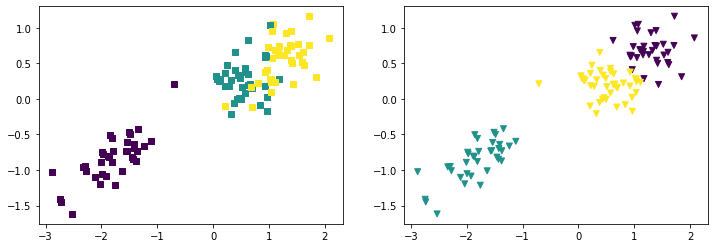

In [64]:
new_X_rp_iris = X_rp_iris
new_X_rp_iris['Output'] = y_rp_iris
new_X_rp_iris['Prediction'] = y_pred
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(new_X_rp_iris.iloc[:,0], new_X_rp_iris.iloc[:,1], c=new_X_rp_iris['Output'], marker='s')
plt.subplot(1,2,2)
plt.scatter(new_X_rp_iris.iloc[:,0], new_X_rp_iris.iloc[:,1], c=new_X_rp_iris['Prediction'], marker='v')

### Digits

In [63]:
rp = GaussianRandomProjection(n_components=30)
t1 = time.time()
rp.fit(X_train_digits)
print(time.time()-t1)
X_rp_digits = pd.DataFrame(rp.transform(X_train_digits), columns=['Component '+str(i) for i in range(1, 30+1)])
X_rp_digits['Output'] = y_train_digits

0.007410764694213867


2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

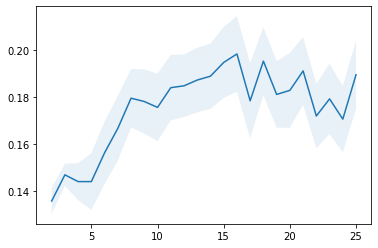

In [74]:
def silhouette(points, kmax):
    avg = []
    std = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(points)
        silhouette_avg = silhouette_score(points, cluster_labels)
        avg.append(np.mean(silhouette_samples(points, cluster_labels)))
        std.append(np.std(silhouette_samples(points, cluster_labels)))
    return avg, std

kmax = 25
means, std = silhouette(X_rp_digits, kmax)
plt.plot(range(2,kmax+1), means)
plt.fill_between(range(2,kmax+1), np.array(means)-np.array(std)**2, np.array(means)+np.array(std)**2, alpha=0.1)

In [64]:
y_rp_digits = X_rp_digits['Output']
X_rp_digits.drop('Output', axis=1, inplace=True)
kmeans = KMeans(n_clusters=8)
t1 = time.time()
kmeans.fit(X_rp_digits)
print(time.time()-t1)
y_pred = kmeans.predict(X_rp_digits)
homogeneity_completeness_v_measure(y_rp_digits, y_pred)

1.428926944732666


(0.41601668808593645, 0.5202535464054843, 0.4623326671452693)

# RP Expectation Minimisation

### Iris

In [65]:
rp = GaussianRandomProjection(n_components=3)
t1 = time.time()
rp.fit(X_train_iris)
print(time.time()-t1)
X_rp_iris = pd.DataFrame(rp.transform(X_train_iris), columns=['Component '+str(i) for i in range(1, 3+1)])
X_rp_iris['Output'] = y_train_iris

0.004599094390869141


2 3 4 5 6 7 8 9 10 

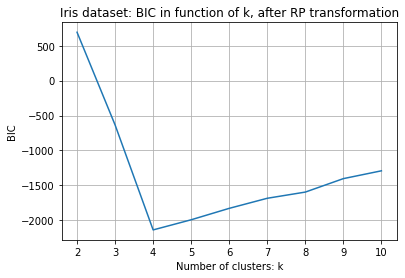

In [111]:
def BAIC_EM(points, kmax):
    bics = []
    aics = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        test = 0
        test2 = 0
        for i in range(3):
            gmm = GaussianMixture(n_components=k)
            gmm.fit(points)
            test += gmm.bic(points)
            test2+= gmm.aic(points)
        bics.append(test)
        aics.append(test2)
    return bics, aics

kmax = 10
BIC, AIC = BAIC_EM(X_rp_iris, kmax)
plt.title('Iris dataset: BIC in function of k, after RP transformation')
plt.xlabel('Number of clusters: k')
plt.ylabel('BIC')
plt.grid()
plt.plot(range(2, kmax+1), BIC)

In [66]:
y_rp_iris = X_rp_iris['Output']
X_rp_iris.drop('Output', axis=1, inplace=True)
ExMa = GaussianMixture(n_components=4)
t1 = time.time()
ExMa.fit(X_rp_iris)
print(time.time()-t1)
y_pred = ExMa.predict(X_rp_iris)
homogeneity_completeness_v_measure(y_rp_iris, y_pred)

0.015567541122436523


(0.7884162973630744, 0.6420267922140215, 0.7077308982280754)

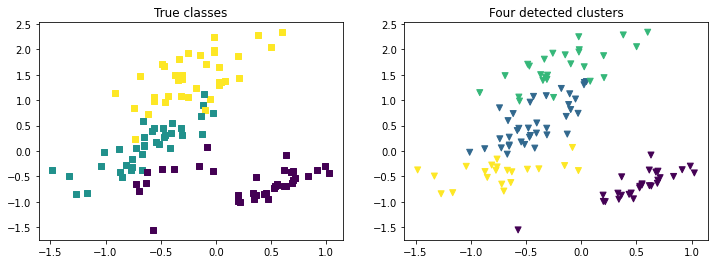

In [122]:
new_X_rp_iris = X_rp_iris
new_X_rp_iris['Output'] = y_rp_iris
new_X_rp_iris['Prediction'] = y_pred
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('True classes')
plt.scatter(new_X_rp_iris.iloc[:,0], new_X_rp_iris.iloc[:,2], c=new_X_rp_iris['Output'], marker='s')
plt.subplot(1,2,2)
plt.title('Four detected clusters')
plt.scatter(new_X_rp_iris.iloc[:,0], new_X_rp_iris.iloc[:,2], c=new_X_rp_iris['Prediction'], marker='v')

### Digits

In [67]:
rp = GaussianRandomProjection(n_components=30)
t1 = time.time()
rp.fit(X_train_digits)
print(time.time()-t1)
X_rp_digits = pd.DataFrame(rp.transform(X_train_digits), columns=['Component '+str(i) for i in range(1, 30+1)])
X_rp_digits['Output'] = y_train_digits

0.00457310676574707


2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

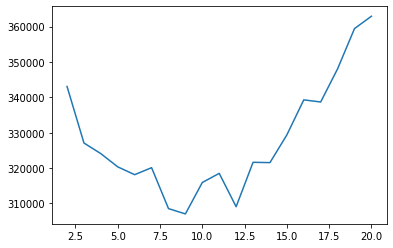

In [96]:
def BAIC_EM(points, kmax):
    bics = []
    aics = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        test = 0
        test2 = 0
        for i in range(3):
            gmm = GaussianMixture(n_components=k, max_iter=1000)
            gmm.fit(points)
            test += gmm.bic(points)
            test2+= gmm.aic(points)
        bics.append(test)
        aics.append(test2)
    return bics, aics

kmax = 20
BIC, AIC = BAIC_EM(X_rp_digits, kmax)
plt.plot(range(2, kmax+1), BIC)

In [68]:
y_rp_digits = X_rp_digits['Output']
X_rp_digits.drop('Output', axis=1, inplace=True)
kmeans = KMeans(n_clusters=10)
t1 = time.time()
kmeans.fit(X_rp_digits)
print(time.time()-t1)
y_pred = kmeans.predict(X_rp_digits)
homogeneity_completeness_v_measure(y_rp_digits, y_pred)

1.495223045349121


(0.5168161130079786, 0.5849048698212582, 0.5487564746641738)

# Random Forest K-Means

### Iris

In [70]:
X_rf_iris = X_train_iris.iloc[:,[2,3]].copy()
X_rf_iris['Output'] = y_train_iris

2 3 4 5 6 7 8 9 10 

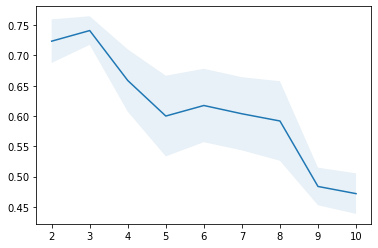

In [107]:
def silhouette(points, kmax):
    avg = []
    std = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(points)
        silhouette_avg = silhouette_score(points, cluster_labels)
        avg.append(np.mean(silhouette_samples(points, cluster_labels)))
        std.append(np.std(silhouette_samples(points, cluster_labels)))
    return avg, std

kmax = 10
means, std = silhouette(X_rf_iris, kmax)
plt.plot(range(2,kmax+1), means)
plt.fill_between(range(2,kmax+1), np.array(means)-np.array(std)**2, np.array(means)+np.array(std)**2, alpha=0.1)

In [71]:
y_rf_iris = X_rf_iris['Output']
X_rf_iris.drop('Output', axis=1, inplace=True)
kmeans = KMeans(n_clusters=3)
t1 = time.time()
kmeans.fit(X_rf_iris)
print(time.time()-t1)
y_pred = kmeans.predict(X_rf_iris)
homogeneity_completeness_v_measure(y_rf_iris, y_pred)

0.02765345573425293


(0.8514598188078363, 0.8514598188078363, 0.8514598188078362)

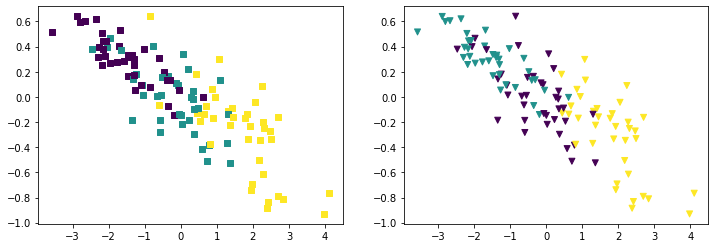

In [109]:
new_X_rf_iris = X_rf_iris
new_X_rf_iris['Output'] = y_rf_iris
new_X_rf_iris['Prediction'] = y_pred
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(new_X_rp_iris.iloc[:,0], new_X_rp_iris.iloc[:,1], c=new_X_rf_iris['Output'], marker='s')
plt.subplot(1,2,2)
plt.scatter(new_X_rp_iris.iloc[:,0], new_X_rp_iris.iloc[:,1], c=new_X_rf_iris['Prediction'], marker='v')

### Digits

In [ ]:
X_rf_digits = X_train_digits.copy()
X_rf_digits['Output'] = y_train_digits

In [38]:
def importances(points):
    importances = []
    for i in range(5):
        RFC = RandomForestClassifier(n_estimators=1000, max_depth=i+1)
        RFC.fit(X_train_digits, y_train_digits)
        importances.append(list(RFC.feature_importances_))
    return np.mean(importances, axis=0), np.std(importances, axis=0)

def sorted(L):
    if len(L) == 0:
        return L
    if len(L) == 1:
        return L
    smaller = []
    bigger = []
    for elem in L[:-1]:
        if elem[0] < L[-1][0]:
            smaller.append(elem)
        else:
            bigger.append(elem)
    return sorted(bigger) + [L[-1]] + sorted(smaller)

def bests(L):
    sum = 0
    i = 0
    S = []
    while sum < 0.8:
        val = 8*L[i][1][1] + L[i][1][0]
        S.append(val)
        i +=1
        sum += L[i][0]
    return S
        

means, std = importances(X_train_digits)
means_sorted = [[means[i], (i%8, i//8)] for i in range(len(means))]
means_sorted = sorted(means_sorted)
to_keep = bests(means_sorted)

In [73]:
X_rf_digits = X_train_digits.iloc[:,to_keep].copy()
X_rf_digits['Output'] = y_train_digits

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

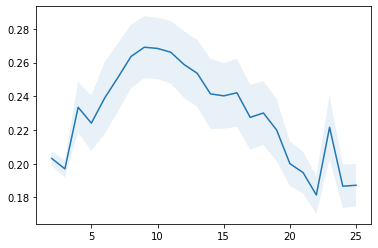

In [65]:
def silhouette(points, kmax):
    avg = []
    std = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(points)
        silhouette_avg = silhouette_score(points, cluster_labels)
        avg.append(np.mean(silhouette_samples(points, cluster_labels)))
        std.append(np.std(silhouette_samples(points, cluster_labels)))
    return avg, std

kmax = 25
means, std = silhouette(X_rf_digits, kmax)
plt.plot(range(2,kmax+1), means)
plt.fill_between(range(2,kmax+1), np.array(means)-np.array(std)**2, np.array(means)+np.array(std)**2, alpha=0.1)

In [74]:
y_rf_digits = X_rf_digits['Output']
X_rf_digits.drop('Output', axis=1, inplace=True)
kmeans = KMeans(n_clusters=10)
t1 = time.time()
kmeans.fit(X_rf_digits)
print(time.time()-t1)
y_pred = kmeans.predict(X_rf_digits)
homogeneity_completeness_v_measure(y_rf_digits, y_pred)

1.407644510269165


(0.6902449535709411, 0.6907518979998493, 0.690498332739327)

# Random Forest - EM

### Iris

In [76]:
X_rf_iris = X_train_iris.iloc[:,[2,3]].copy()
X_rf_iris['Output'] = y_train_iris

2 3 4 5 6 7 8 9 10 

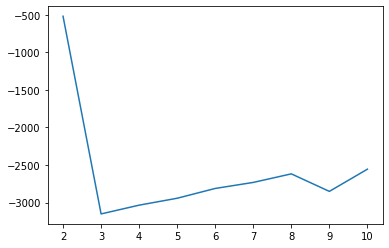

In [68]:
def BAIC_EM(points, kmax):
    bics = []
    aics = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        test = 0
        test2 = 0
        for i in range(3):
            gmm = GaussianMixture(n_components=k)
            gmm.fit(points)
            test += gmm.bic(points)
            test2+= gmm.aic(points)
        bics.append(test)
        aics.append(test2)
    return bics, aics

kmax = 10
BIC, AIC = BAIC_EM(X_rf_iris, kmax)
plt.plot(range(2, kmax+1), BIC)

In [77]:
y_rf_iris = X_rf_iris['Output']
X_rf_iris.drop('Output', axis=1, inplace=True)
ExMa = GaussianMixture(n_components=3)
t1 = time.time()
ExMa.fit(X_rf_iris)
print(time.time()-t1)
y_pred = ExMa.predict(X_rf_iris)
homogeneity_completeness_v_measure(y_rf_iris, y_pred)

0.011352777481079102


(0.8989514300582213, 0.8989514300582213, 0.8989514300582214)

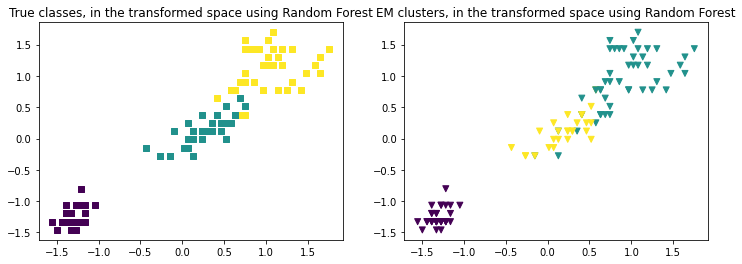

In [148]:
new_X_rf_iris = X_rf_iris
new_X_rf_iris['Output'] = y_rf_iris
new_X_rf_iris['Prediction'] = y_pred
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('True classes, in the transformed space using Random Forest')
plt.scatter(new_X_rf_iris.iloc[:,0], new_X_rf_iris.iloc[:,1], c=new_X_rf_iris['Output'], marker='s')
plt.subplot(1,2,2)
plt.title('EM clusters, in the transformed space using Random Forest')
plt.scatter(new_X_rf_iris.iloc[:,0], new_X_rf_iris.iloc[:,1], c=new_X_rf_iris['Prediction'], marker='v')

### Digits

In [79]:
X_rf_digits = X_train_digits.iloc[:,to_keep].copy()
X_rf_digits['Output'] = y_train_digits

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

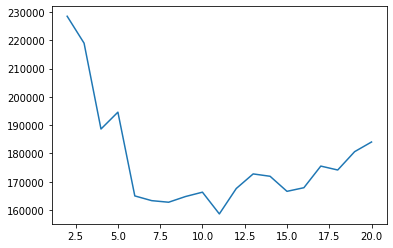

In [75]:
def BAIC_EM(points, kmax):
    bics = []
    aics = []
    for k in range(2, kmax+1):
        print(k, end=' ')
        test = 0
        test2 = 0
        for i in range(3):
            gmm = GaussianMixture(n_components=k, max_iter=1000)
            gmm.fit(points)
            test += gmm.bic(points)
            test2+= gmm.aic(points)
        bics.append(test)
        aics.append(test2)
    return bics, aics

kmax = 20
BIC, AIC = BAIC_EM(X_rf_digits, kmax)
plt.plot(range(2, kmax+1), BIC)

In [80]:
y_rf_digits = X_rf_digits['Output']
X_rf_digits.drop('Output', axis=1, inplace=True)
kmeans = KMeans(n_clusters=10)
t1 = time.time()
kmeans.fit(X_rf_digits)
print(time.time()-t1)
y_pred = kmeans.predict(X_rf_digits)
homogeneity_completeness_v_measure(y_rf_digits, y_pred)

1.5090341567993164


(0.6931904290385659, 0.6939750992232591, 0.6935825422009099)

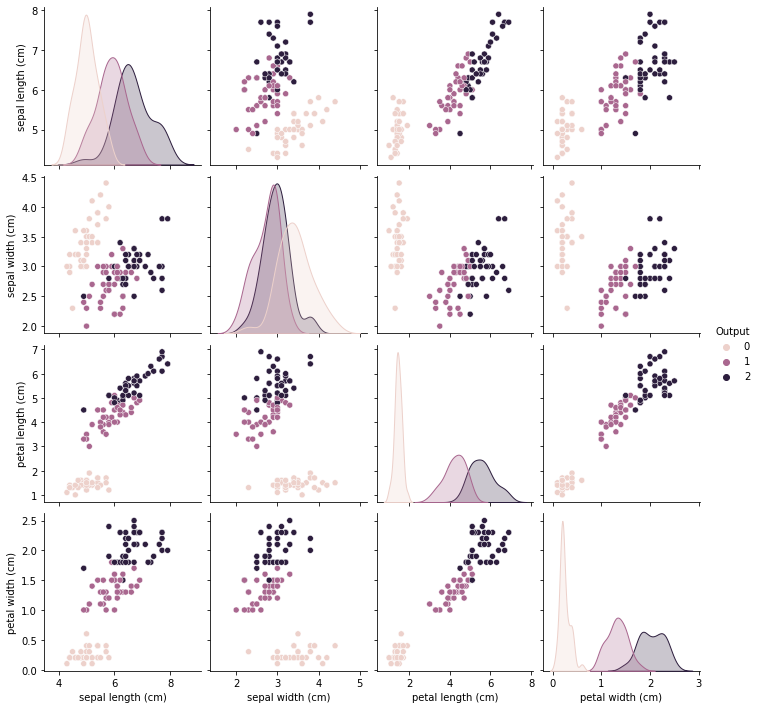

In [44]:
sns.pairplot(train_ds_iris, hue="Output")

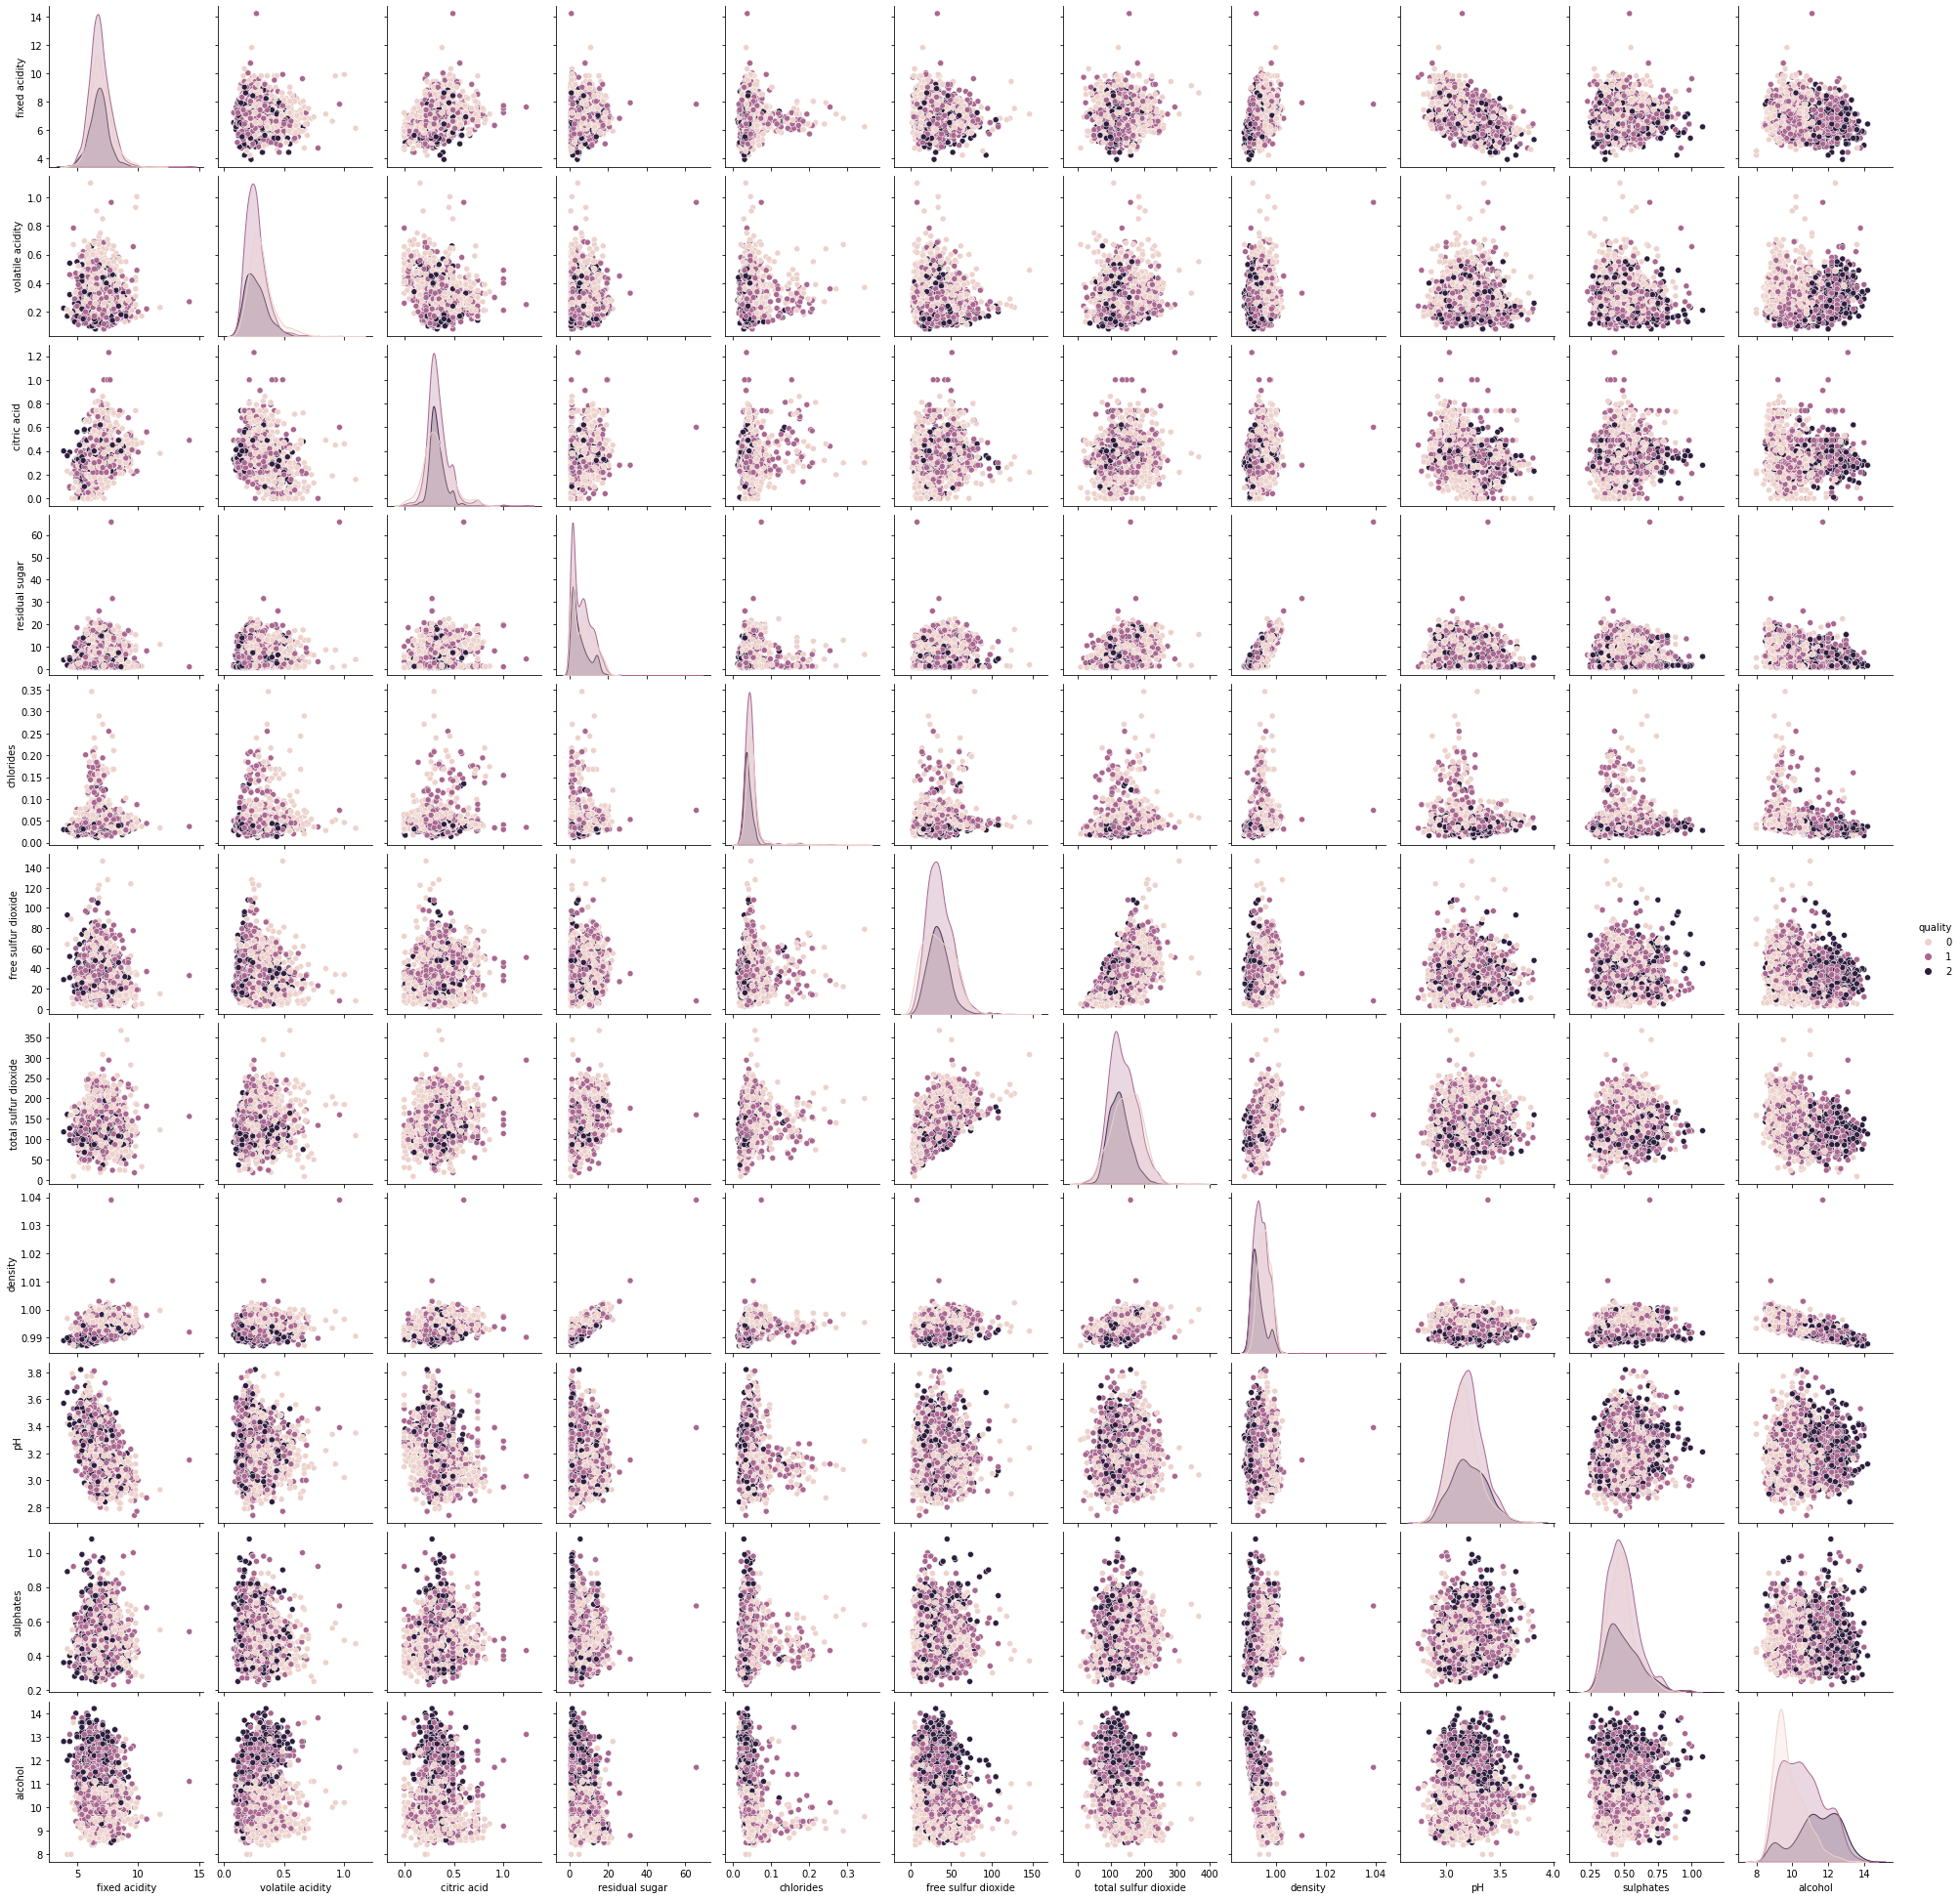

In [12]:
sns.pairplot(train_ds_wine, hue="quality")